In [16]:
##### change filename to numpy image and label

### get filename
import glob
### get image
from PIL import Image
import numpy as np
import tensorflow as tf

busyFilelist = glob.glob("C:/Users/Chaya/Google Drive/Competation/Carpark/Local/data/test/busy/*")
freeFilelist = glob.glob("C:/Users/Chaya/Google Drive/Competation/Carpark/Local/data/test/free/*")
filelist = busyFilelist + freeFilelist

# shuffle
from random import shuffle
shuffle(filelist)

imsize = 224

## seperate to 100 each
file_batches = []
n = 0
file_batch = []
for file in filelist:
    file_batch.append(file)
    n += 1
    if n % 100 == 0:
        file_batches.append(file_batch)
        file_batch = []

file_batches.append(file_batch)
print('number of batchs:', len(file_batches))
print('batch size:', len(file_batches[0]))


number of batchs: 18
batch size: 100


In [17]:
# load trained model
model = tf.keras.models.load_model('../AWS/trained_carpark_MobileNetV2.h5')

# Show the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
average_pooling2d (AveragePo (None, 4, 4, 1280)        0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 1280)        0         
_________________________________________________________________
dense (Dense)                (None, 4, 4, 1280)        1639680   
_________________________________________________________________
average_pooling2d_1 (Average (None, 2, 2, 1280)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 2, 1280)        0         
_________________________________________________________________
dense_1 (Dense)              (None, 2, 2, 640)         8

In [18]:
keras = tf.keras
test_loss = []
test_acc = []
sum_acc = 0

i = 0
total = len(file_batches)
# batch size = 10
for file_batch in file_batches:
    print('batch number: ' + str(i) + ' out of ' + str(total))
    im = np.empty((1,imsize,imsize,3), int)
    for filename in file_batch:
        img = Image.open(filename).resize((imsize,imsize))
        im = np.append(im, ((np.asarray(img, dtype="int32")/127.5) - 1).reshape((1,imsize,imsize,3)), axis=0)
    im = im[1:]

    ### get label
    label = []
    n = 0
    for filename in file_batch:
        if filename.split("/")[-1][0:4] == 'busy':
            label.append(1)
        else:
            label.append(0)
    X = tf.convert_to_tensor(im, dtype=tf.float64)
    y = tf.convert_to_tensor(label, dtype=tf.float64)

    loss, acc = model.evaluate(X, y, batch_size=10, steps=1)
    test_loss.append(loss)
    test_acc.append(acc)
    sum_acc += acc
    print('Restored model, accuracy: {:5.2f}%'.format(100*acc))
    
    i += 1

batch number: 0 out of 18
10/1 [============================================================================================================================================================================================================================================================================================================] - 2s 196ms/sample - loss: 1.6867 - accuracy: 0.8000
Restored model, accuracy: 80.00%
batch number: 1 out of 18
10/1 [============================================================================================================================================================================================================================================================================================================] - 0s 42ms/sample - loss: 3.3733 - accuracy: 0.6000
Restored model, accuracy: 60.00%
batch number: 2 out of 18
10/1 [===================================================================================================================================

average accuracy: 0.7194444537162781


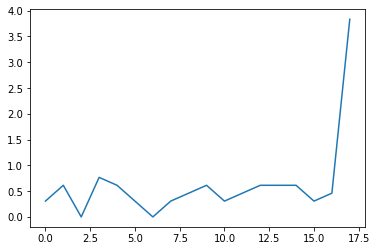

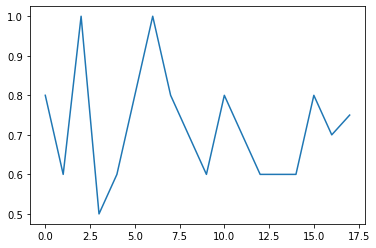

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

print("average accuracy:", sum_acc/i)

plt.plot(test_loss)
plt.show()
plt.plot(test_acc)
plt.show()